In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

df = pd.read_csv('churn_lloyds.csv')
# print(df.head())
# df.describe()
df['Unresolved%'] = df['Unresolved%'].str.replace('%', '', regex=False).astype(float)
median_val = df['Unresolved%'].median()
df['Unresolved%'] = df['Unresolved%'].fillna(0)
df['Complaint%'] = df['Complaint%'].str.replace('%','', regex=False).astype(float)
df['Complaint%'] = df['Complaint%'].fillna(0)
# print(df.head())
count_na = df.isnull().sum()
print(count_na)
print(df.shape)


CustomerID        0
ChurnStatus       0
Age               0
Gender            0
MaritalStatus     0
IncomeLevel       0
TotalAmount       0
LoginFrequency    0
ServiceUsage      0
Unresolved%       0
Complaint%        0
dtype: int64
(1000, 11)


ChurnStatus      0   1
MaritalStatus         
Divorced       202  46
Married        201  60
Single         171  44
Widowed        222  54


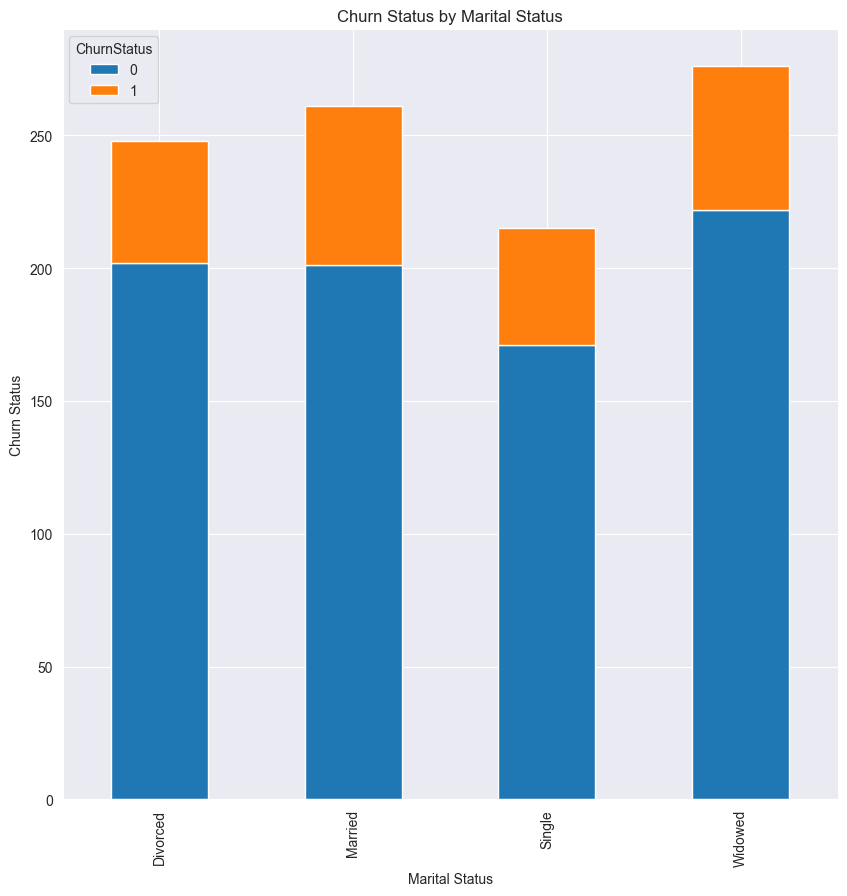

In [26]:
crosstab_df = pd.crosstab(df['MaritalStatus'], df['ChurnStatus'])
print(crosstab_df.head())
crosstab_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 10),
)

plt.title('Churn Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Churn Status')
plt.show()

ChurnStatus    0    1
Gender               
F            412  101
M            384  103


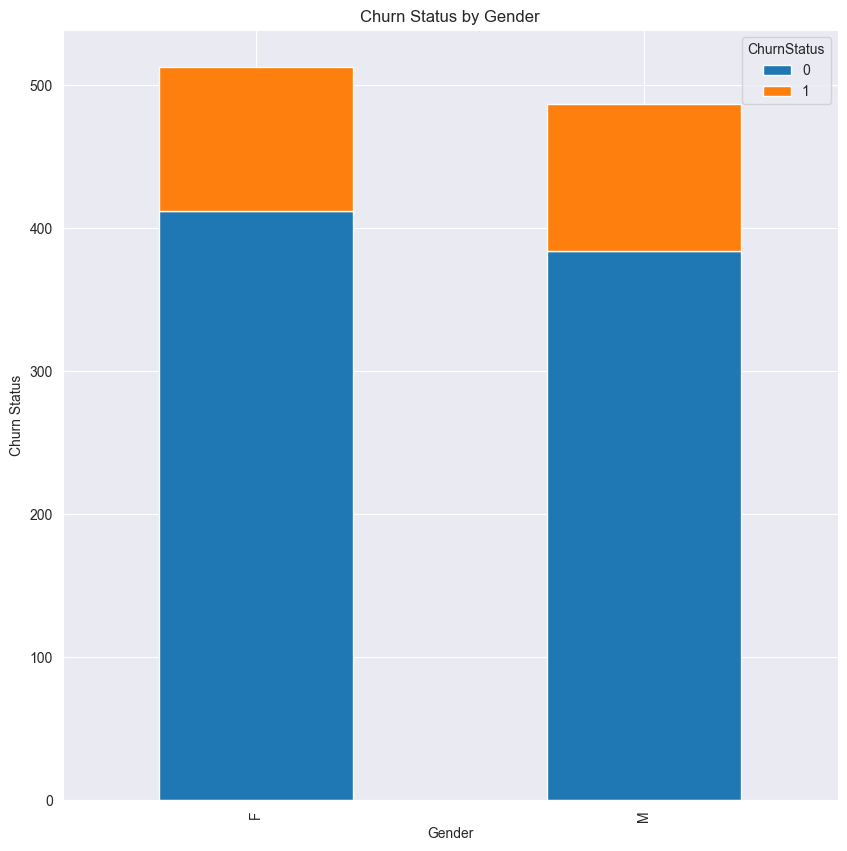

In [27]:
crosstab_df2 = pd.crosstab(df['Gender'], df['ChurnStatus'])
print(crosstab_df2.head())
crosstab_df2.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 10),
)

plt.title('Churn Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Status')
plt.show()

ChurnStatus    0   1
IncomeLevel         
High         282  67
Low          253  72
Medium       261  65


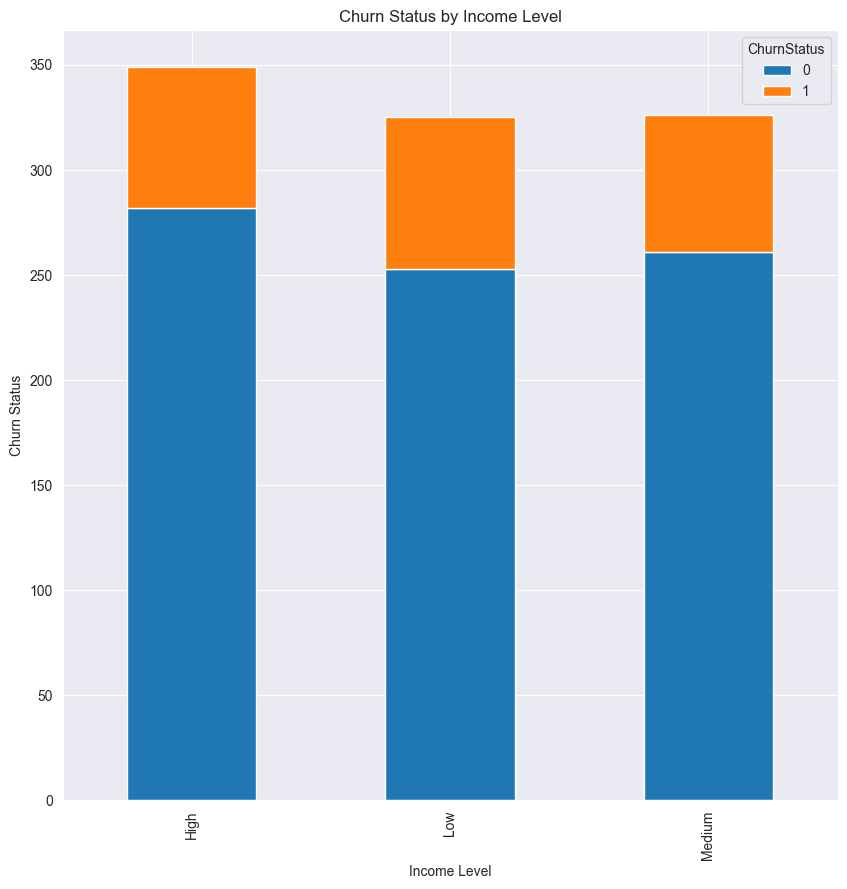

In [28]:
crosstab_df3 = pd.crosstab(df['IncomeLevel'], df['ChurnStatus'])
print(crosstab_df3.head())
crosstab_df3.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 10),
)

plt.title('Churn Status by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Churn Status')
plt.show()

ChurnStatus       0   1
ServiceUsage           
Mobile App      263  79
Online Banking  279  70
Website         254  55


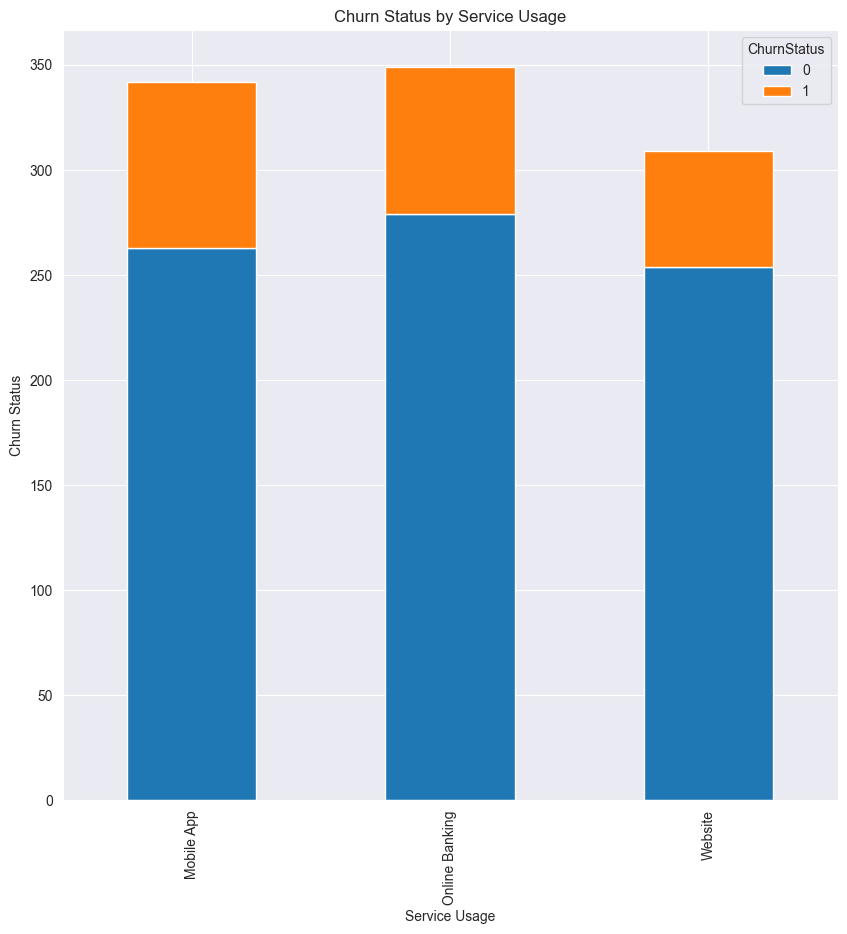

In [29]:
crosstab_df4 = pd.crosstab(df['ServiceUsage'], df['ChurnStatus'])
print(crosstab_df4.head())
crosstab_df4.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 10),
)

plt.title('Churn Status by Service Usage')
plt.xlabel('Service Usage')
plt.ylabel('Churn Status')
plt.show()

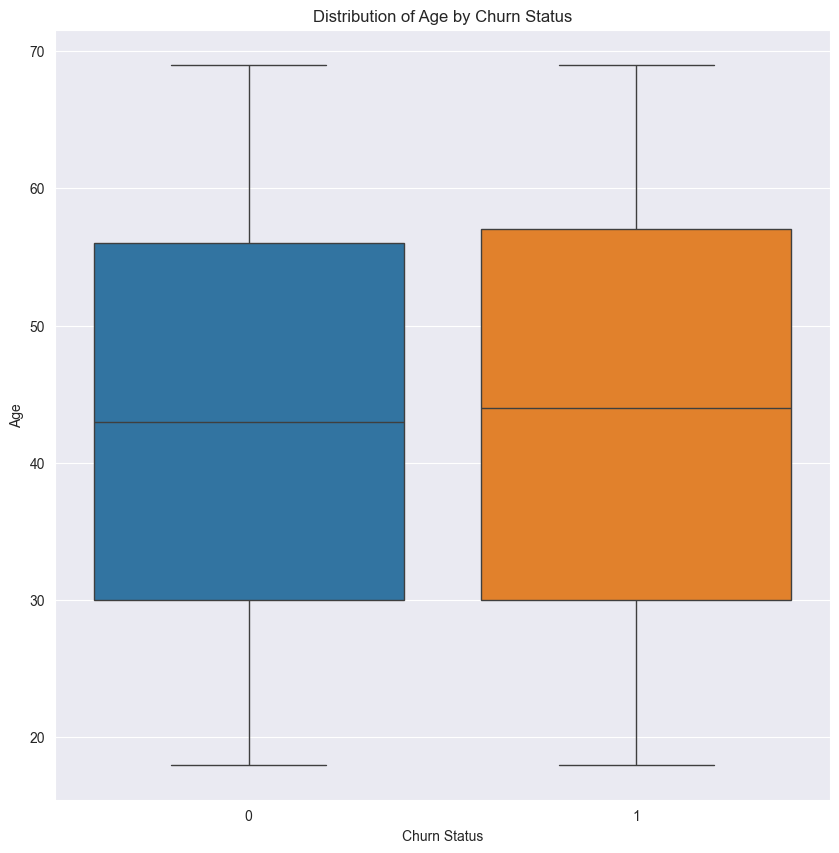

In [30]:
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=df['ChurnStatus'],
    y=df['Age'],
    data = df,
    hue='ChurnStatus',
    legend = False

)

plt.title('Distribution of Age by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.show()

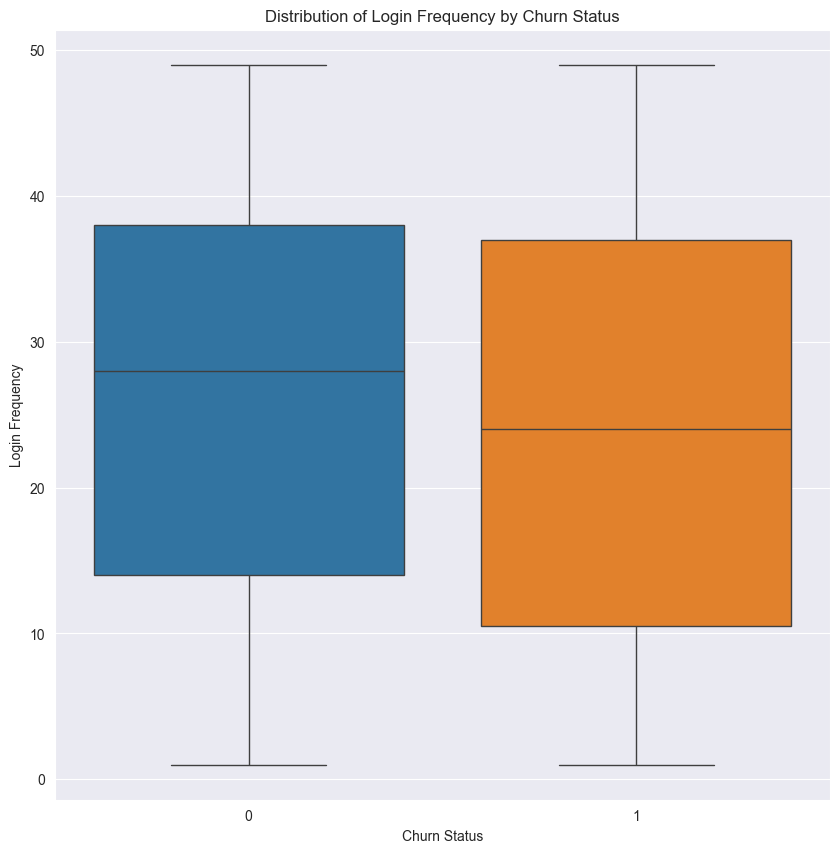

In [31]:
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=df['ChurnStatus'],
    y=df['LoginFrequency'],
    data = df,
    hue='ChurnStatus',
    legend = False

)

plt.title('Distribution of Login Frequency by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Login Frequency')
plt.show()

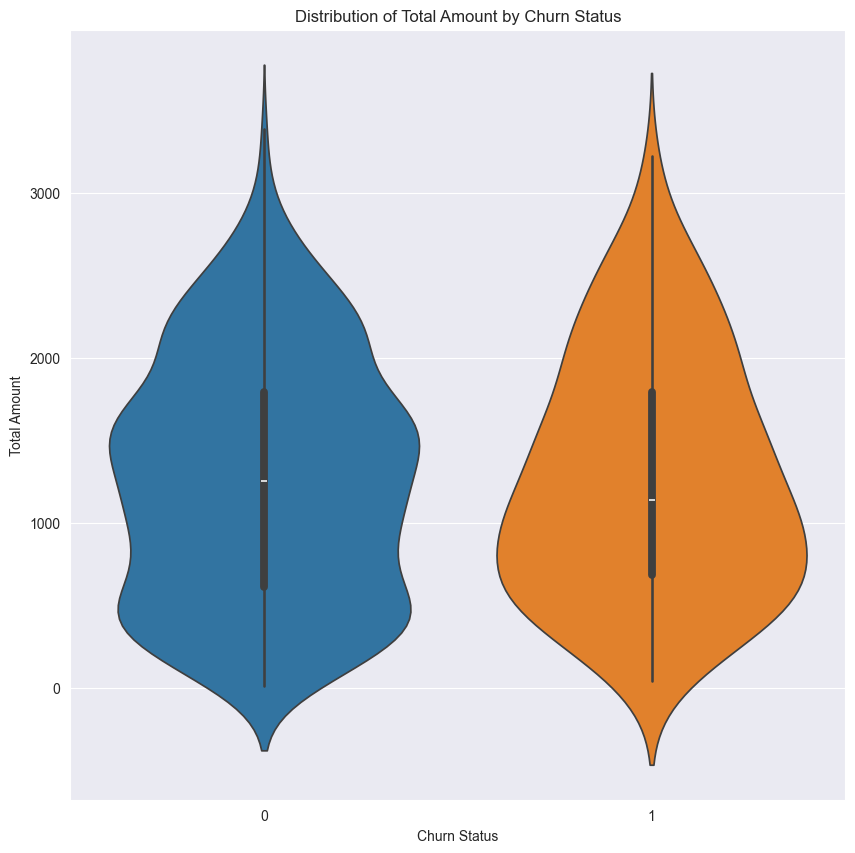

In [32]:
plt.figure(figsize=(10, 10))
sns.violinplot(
    x=df['ChurnStatus'],
    y=df['TotalAmount'],
    data = df,
    hue='ChurnStatus',
    legend=False
)

plt.title('Distribution of Total Amount by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Amount')
plt.show()

Unresolved%  0.0    50.0   100.0
ChurnStatus                     
0              473    154    169
1              119     33     52


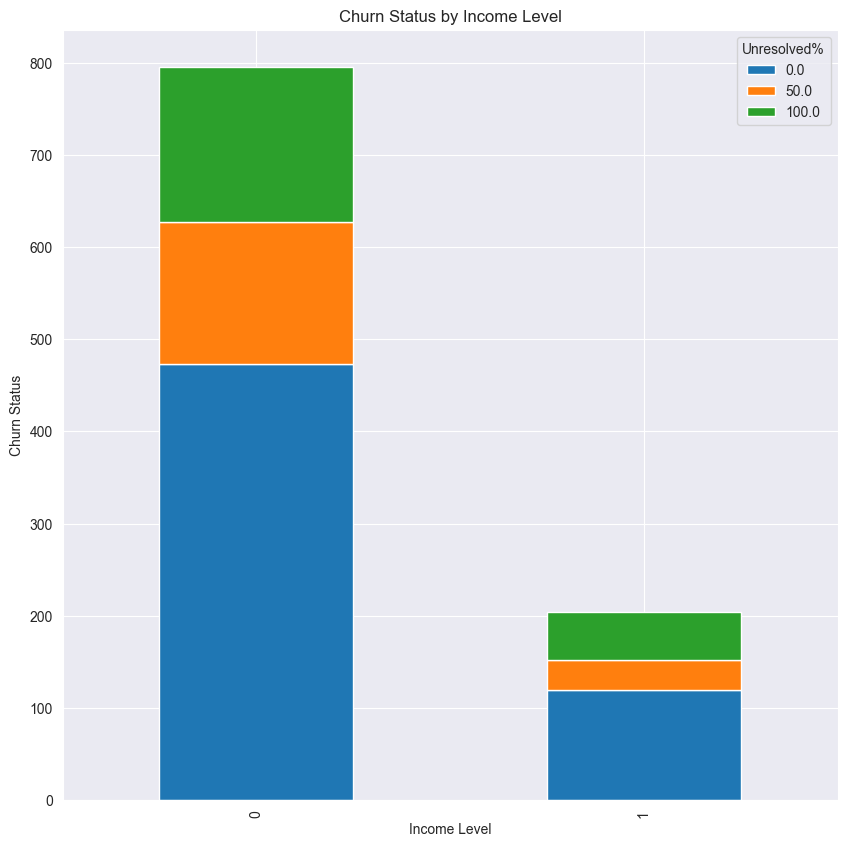

In [33]:
crosstab_df3 = pd.crosstab( df['ChurnStatus'], df['Unresolved%'])
print(crosstab_df3.head())
crosstab_df3.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 10),
)

plt.title('Churn Status by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Churn Status')
plt.show()

In [34]:
if 'Age' in df.columns and 'LoginFrequency' in df.columns:
    df['Age_per_login'] = df['Age'] / (df['LoginFrequency']+1)


if 'TotalAmount' in df.columns and 'LoginFrequency' in df.columns:
    df['Total_per_login'] = df['TotalAmount'] / (df['LoginFrequency']+1)

categorical_fatures = ['Gender', 'MaritalStatus', 'ServiceUsage']
ordinal_features = ['IncomeLevel']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot',
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         categorical_fatures),

        ('ordinal',
         OrdinalEncoder(categories=[['Low', 'Medium', 'High']]),
        ordinal_features)

    ],
    remainder='passthrough'
)

processed_data = preprocessor.fit_transform(df)
feature_names = preprocessor.get_feature_names_out()
df_processed = pd.DataFrame(processed_data, columns=feature_names)
print(df_processed.head())

   onehot__Gender_F  onehot__Gender_M  onehot__MaritalStatus_Divorced  \
0               0.0               1.0                             0.0   
1               0.0               1.0                             0.0   
2               0.0               1.0                             0.0   
3               0.0               1.0                             0.0   
4               0.0               1.0                             1.0   

   onehot__MaritalStatus_Married  onehot__MaritalStatus_Single  \
0                            0.0                           1.0   
1                            1.0                           0.0   
2                            0.0                           1.0   
3                            0.0                           0.0   
4                            0.0                           0.0   

   onehot__MaritalStatus_Widowed  onehot__ServiceUsage_Mobile App  \
0                            0.0                              1.0   
1                         

## To handle imbalance in the dataset
resampling, SMOT, adjusted class weights, cross-validation ,
## Feature engineering
INteraction terms, polynomial features and dimensionality reduction
Need for logistic regression and SVM
## hyperparameter tuning
For systematic exploration of hyperparameters - grid search or random search
for efficiency - Bayesian optimisation

## dimensionality reduction
PCA t-SNE
## model evlation metrics
for imbalanced data set don't use accuracy use precision, recall, F1-score, ROC_AUC, confusion matrix

## model implementation and scalability
Pipeline integration: Incorporate the model into a robust data pipeline, ensuring it can handle real-time data streams and integrate seamlessly with existing systems. This includes automating data preprocessing, model prediction, and output generation.
Model monitoring and maintenance: Post-deployment, continuously monitor model performance to detect drifts in data distribution or declines in accuracy. Implementing version control for models, along with retraining strategies, ensures the model remains accurate and relevant as new data becomes available.


## 1. Stratified cross-validation

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)

Y = df_processed['remainder__ChurnStatus']
X = df_processed.drop(['remainder__ChurnStatus', 'remainder__CustomerID'], axis=1)
n_splits = 10
X_train = []
X_test = []
y_train = []
y_test = []
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X,Y):
    X_train = X.iloc[train_index, :]
    X_test = X.iloc[test_index, :]
    y_train = Y.iloc[train_index]
    y_test = Y.iloc[test_index]

### Evaluate the model
Accuracy: how often is the classifier correct


Precision: of all the items model labeled as positive how many were actually positive


Recall: Of all the actual positives how many did the model correctly identify


F1: mean of precision and recall


ROC-AUC: how well can the model distinguish between positive and negative classes. probability the model will rank random positive example higher than randomly chosen negative example


In [36]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
model = RandomForestClassifier(
    random_state=42,
    n_estimators=500,
    max_depth=4,
    class_weight='balanced',
    min_samples_leaf = 5,
                          )


#SMOTE - create synthetic examples of churners
smote = SMOTE(random_state=42)
X_train_resample, Y_train_resample = smote.fit_resample(X_train, y_train)

model.fit(X_train_resample, Y_train_resample)
print(f"Model Accuracy on Train Data: {model.score(X_train, y_train):.2f}")
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]



#threshold optimisation
threshold = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_thresh = 0.5

y_test_flat = y_test.to_numpy().ravel()

for t in threshold:
    prediction = (y_prob>=t).astype(int)
    score = f1_score(y_test_flat, prediction, zero_division=0)
    if score> best_f1:
        best_f1 = score
        best_threshold = t

final_preds = (y_prob >= best_thresh).astype(int)

print(f"----------------")
print(f"Best Threshold Found: {best_thresh:.2f}")
print("-" * 30)
print(f"Optimized F1 Score:   {best_f1:.3f} (Previous: ~0.29)")
print(f"Optimized Recall:     {recall_score(y_test_flat, final_preds):.3f}")
print(f"Optimized Precision:  {precision_score(y_test_flat, final_preds):.3f}")
print(f"ROC AUC Score:        {roc_auc_score(y_test_flat, y_prob):.3f}")
print("-" * 30)
print("\nClassification Report:\n")
print(classification_report(y_test_flat, final_preds))

Model Accuracy on Train Data: 0.80
----------------
Best Threshold Found: 0.50
------------------------------
Optimized F1 Score:   0.362 (Previous: ~0.29)
Optimized Recall:     0.000
Optimized Precision:  0.000
ROC AUC Score:        0.497
------------------------------

Classification Report:

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86        79
         1.0       0.00      0.00      0.00        21

    accuracy                           0.76       100
   macro avg       0.39      0.48      0.43       100
weighted avg       0.62      0.76      0.68       100

